In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data_exploration.csv")
data_timeseries = pd.read_csv("data_timeseries.csv")

data.head(10)

,Unnamed: 0,datetime,sensor1,sensor2,temperature,relative_humidity,offset_fault,day,month,year
0,0,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0,3,11,2021
1,1,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0,8,11,2021
2,2,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0,7,11,2021
3,3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0,1,1,2022
4,4,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0,5,11,2021
5,5,2022-01-13 09:07:32,27.58,18.92,26.1,57.0,1,13,1,2022
6,6,2021-12-18 02:25:06,43.62,34.62,20.6,86.0,1,18,12,2021
7,7,2021-11-11 04:18:59,104.35,98.00,20.3,94.0,0,11,11,2021
8,8,2021-12-19 06:17:43,19.22,13.25,19.3,92.0,1,19,12,2021
9,9,2022-01-01 16:19:02,2.02,5.22,27.1,66.0,0,1,1,2022


In [3]:
data.drop(columns=['Unnamed: 0','datetime'],inplace=True)

Unnamed and datetime have been dropped because they are not useful features

In [4]:
data.head()

,sensor1,sensor2,temperature,relative_humidity,offset_fault,day,month
0,52.58,49.52,17.4,96.0,0,3,11
1,35.25,33.40,25.0,75.0,0,8,11
2,19.18,23.50,24.9,75.0,0,7,11
3,19.40,15.48,24.9,70.0,0,1,1
4,38.30,34.77,20.9,89.0,0,5,11


In [21]:
#Lets deal with null values

data.isna().sum()

sensor1              3614
sensor2              3614
temperature          3549
relative_humidity    3549
offset_fault            0
day                     0
month                   0
dtype: int64

Investigating the category of missing valus, either MAR, MCAR, MNAR

In [20]:
data[data['sensor1'].isnull()==True]

,sensor1,sensor2,temperature,relative_humidity,offset_fault,day,month
124,NaN,NaN,20.3,91.0,1,19,10
169,NaN,NaN,26.8,68.0,0,21,10
205,NaN,NaN,20.1,91.0,1,19,10
249,NaN,NaN,28.3,62.0,1,19,10
474,NaN,NaN,19.9,97.0,0,21,10
...,...,...,...,...,...,...,...
296656,NaN,NaN,27.9,64.0,0,20,10
296667,NaN,NaN,19.5,95.0,0,21,10
296791,NaN,NaN,24.4,82.0,0,20,10
296938,NaN,NaN,22.1,79.0,1,18,10


In [31]:
print("missing sensor")
print(data[data['sensor1'].isnull()==True]['month'].value_counts())
print()
print("sensor available")
print(data[data['sensor1'].isnull()==False]['month'].value_counts())

missing sensor
10    3614
Name: month, dtype: int64

sensor available
12    93863
11    91824
1     61776
10    46100
Name: month, dtype: int64


In [34]:
print("missing sensor")
print(data[data['sensor1'].isnull()==True]['year'].value_counts())
print()
print("sensor available")
print(data[data['sensor1'].isnull()==False]['year'].value_counts())

missing sensor
2021    3614
Name: year, dtype: int64

sensor available
2021    231787
2022     61776
Name: year, dtype: int64


In [32]:
print("missing sensor")
print(data[data['sensor1'].isnull()==True]['day'].value_counts())
print()
print("sensor available")
print(data[data['sensor1'].isnull()==False]['day'].vlue_counts())

missing sensor
19    949
21    940
18    593
22    585
20    547
Name: day, dtype: int64

sensor available
17    12321
16    12086
20    11492
19    11189
18    11175
15    10108
28     9434
7      9353
3      9350
27     9346
2      9315
5      9303
4      9302
29     9277
6      9258
26     9241
11     9237
30     9228
10     9220
1      9189
13     9171
25     9169
24     9140
23     9096
12     9067
14     9060
21     8960
22     8556
8      8339
9      8282
31     6299
Name: day, dtype: int64


This provides a valuable insight, In places where sensor was NaN, it was the 10th month, at the ending days of each month, to be precise, beyond the 17th day, also missing values particularly occur in 2021

In [26]:
data[data.sensor1.isna()==False]['month'].value_counts()

12    93863
11    91824
1     61776
10    46100
Name: month, dtype: int64

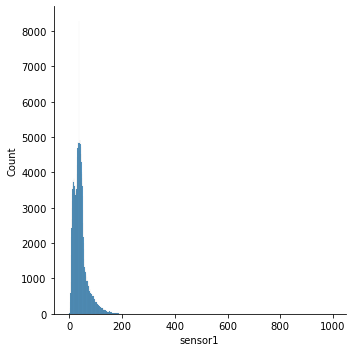

In [5]:
data.loc[data.sensor1.isna()==True,['sensor1']] = data['sensor1'].median()
data.loc[data.sensor1.isna()==True,['sensor2']] = data['sensor2'].median()

sns.displot(data['sensor1'])

Looking at the plot from the EDA notebook, we can confirm, our distribution did not change, which is largely what we want

In [57]:
print("not missing")
print(data[data['temperature'].isna()==False]['year'].value_counts())
print(data[data['temperature'].isna()==False]['month'].value_counts())
print(data[data['temperature'].isna()==False]['day'].value_counts())
print()
print("missing")
print(data[data['temperature'].isna()==True]['year'].value_counts())
print(data[data['temperature'].isna()==True]['month'].value_counts())
print(data[data['temperature'].isna()==True]['day'].value_counts())

not missing
2021    233316
2022     60312
Name: year, dtype: int64
12    92818
11    91036
1     60312
10    49462
Name: month, dtype: int64
17    12321
16    12086
20    12039
18    11768
19    11759
15    10108
21     9497
28     9434
7      9353
3      9350
27     9346
2      9315
5      9303
4      9302
6      9258
11     9237
10     9220
1      9189
13     9171
25     9169
22     9141
26     9061
14     9060
29     8962
24     8822
23     8769
30     8686
12     8541
9      8178
8      7884
31     6299
Name: day, dtype: int64

missing
2021    2085
2022    1464
Name: year, dtype: int64
1     1464
12    1045
11     788
10     252
Name: month, dtype: int64
30    542
12    526
8     455
21    403
19    379
23    327
24    318
29    315
26    180
9     104
Name: day, dtype: int64


There is little dependence on Month, but not enough for me to want to probe further, i'll assume no dependence

<AxesSubplot:xlabel='temperature', ylabel='Density'>

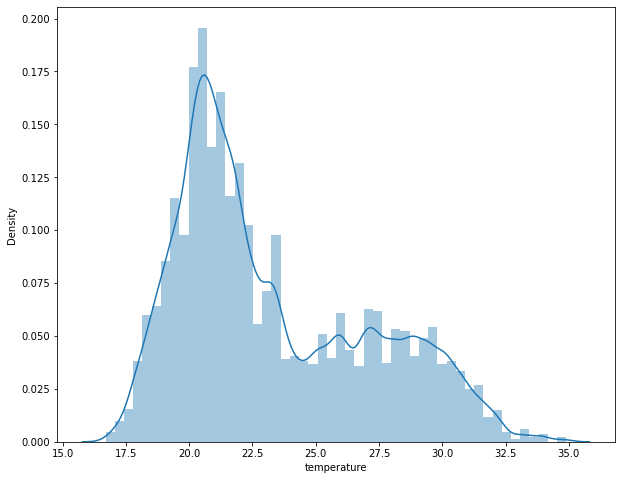

In [4]:
data.loc[data.temperature.isna()==True,['temperature']] = data['temperature'].mean()
data.loc[data.relative_humidity.isna()==True,['relative_humidity']] = data['relative_humidity'].mean()

sns.distplot(data['temperature'])

Distribution is conserved

In [6]:
#Lets now work on the outliers in the data
#we will cap outliers to 0.95 percentile

def outlier_removal(df,columns):
    df_ = df.copy()
    for col in columns:
        high = df_[col].quantile(0.98)
        low = df_[col].quantile(0.02)
        df_.loc[df_[col]>high,col]=high
        df_.loc[df_[col]<low,col]=low
    return df_

data_ = outlier_removal(data,['sensor1','sensor2'])

<AxesSubplot:xlabel='sensor1'>

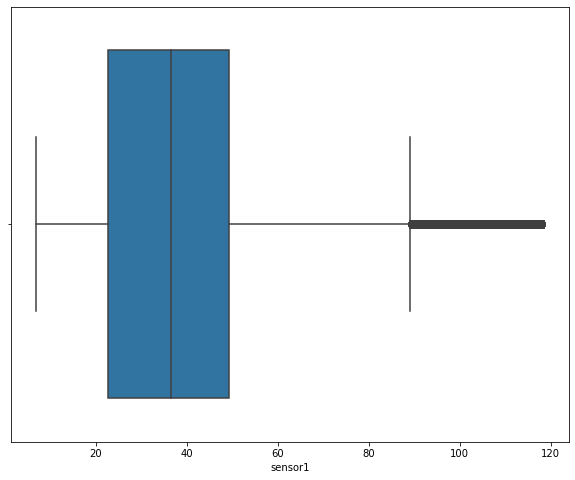

In [7]:
sns.boxplot('sensor1',data=data_)

In [117]:
data_

,sensor1,sensor2,temperature,relative_humidity,offset_fault,day,month,year
0,52.58,49.52,17.4,96.0,0,3,11,2021
1,35.25,33.40,25.0,75.0,0,8,11,2021
2,19.18,23.50,24.9,75.0,0,7,11,2021
3,19.40,15.48,24.9,70.0,0,1,1,2022
4,38.30,34.77,20.9,89.0,0,5,11,2021
...,...,...,...,...,...,...,...,...
297172,36.40,37.77,28.6,62.0,0,19,11,2021
297173,50.12,40.63,21.6,86.0,1,22,11,2021
297174,53.68,45.23,20.2,94.0,1,5,11,2021
297175,96.45,114.67,20.6,93.0,0,23,11,2021


In [120]:
data_['sensor1'].rolling(30).max()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
297172    118.38
297173    118.38
297174    118.38
297175    118.38
297176    118.38
Name: sensor1, Length: 297177, dtype: float64

In [8]:
#We now Engineer New Features

data_['dew_point'] = (243.04 * (np.log(data_['relative_humidity']/100) + ((17.625 * data_['temperature'])/(243.04 + data_['temperature'])))) / (17.625 - (np.log(data_['relative_humidity']/100) + ((17.625 * data_['temperature'])/(243.04 + data_['temperature']))))
data_['partial_pressure'] = data_['relative_humidity']/100 * 6.105 * np.exp((17.27 * data_['temperature'])/(237.7 + data_['temperature']))
data_['svp'] = 6.11 * 10**(7.5*data_['temperature']/(237.3 + data_['temperature']))
data_['heat_index'] = -42.379 + 2.04901523 * data_.temperature + 10.14333127 * data_.relative_humidity - 0.22475541 * data_.temperature * data_.relative_humidity - 6.83783 * 10**-3 * data_.temperature**2 - 5.481717 * 10**-2 * data_.relative_humidity**2 + 1.22874 * 10**-3 * data_.temperature**2 * data_.relative_humidity + 8.5282 * 10**-4 * data_.temperature * data_.relative_humidity**2 - 1.99 * 10**-6 * data_.temperature**2 * data_.relative_humidity**2
data['THI'] = 0.81 * data_.temperature + 0.01 * data_.relative_humidity * (0.99 * data_.temperature - 14.3) + 46.3


data_['sensor1_rolling30'] = data_['sensor1'].rolling(30).mean()
data_['sensor1_rolling60'] = data_['sensor1'].rolling(60).mean()
data_['sensor2_rolling30'] = data_['sensor2'].rolling(30).mean()
data_['sensor2_rolling60'] = data_['sensor2'].rolling(60).mean()

In [9]:
data_

,sensor1,sensor2,temperature,relative_humidity,offset_fault,day,month,year,dew_point,partial_pressure,svp,heat_index,sensor1_rolling30,sensor1_rolling60,sensor2_rolling30,sensor2_rolling60
0,52.58,49.52,17.4,96.0,0,3,11,2021,16.755198,19.034397,19.879649,251.254530,NaN,NaN,NaN,NaN
1,35.25,33.40,25.0,75.0,0,8,11,2021,20.260235,23.687222,31.686302,206.088513,NaN,NaN,NaN,NaN
2,19.18,23.50,24.9,75.0,0,7,11,2021,20.163740,23.546685,31.498058,206.719688,NaN,NaN,NaN,NaN
3,19.40,15.48,24.9,70.0,0,1,1,2022,19.052663,21.976906,31.498058,205.417359,NaN,NaN,NaN,NaN
4,38.30,34.77,20.9,89.0,0,5,11,2021,19.018309,21.940456,24.724570,230.007403,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297172,36.40,37.77,28.6,62.0,0,19,11,2021,20.607709,24.187358,39.150333,180.077171,36.783667,37.689333,34.165333,36.050667
297173,50.12,40.63,21.6,86.0,1,22,11,2021,19.156888,22.129175,25.808658,226.758898,37.544333,37.922500,34.711333,36.235833
297174,53.68,45.23,20.2,94.0,1,5,11,2021,19.202836,22.195827,23.680492,230.735934,37.879667,38.677167,34.895667,36.876000
297175,96.45,114.67,20.6,93.0,0,23,11,2021,19.427693,22.507720,24.272282,228.694068,39.379000,40.081667,37.063000,38.652667


In [10]:
data_['sensor1_rolling30'].where(data_['sensor1_rolling30'].isna()==False,data_['sensor1_rolling30'].min(),inplace=True)
data_['sensor1_rolling60'].where(data_['sensor1_rolling60'].isna()==False,data_['sensor1_rolling60'].min(),inplace=True)
data_['sensor2_rolling30'].where(data_['sensor2_rolling30'].isna()==False,data_['sensor2_rolling30'].min(),inplace=True)
data_['sensor2_rolling60'].where(data_['sensor2_rolling60'].isna()==False,data_['sensor2_rolling60'].min(),inplace=True)

In [11]:
data_

,sensor1,sensor2,temperature,relative_humidity,offset_fault,day,month,year,dew_point,partial_pressure,svp,heat_index,sensor1_rolling30,sensor1_rolling60,sensor2_rolling30,sensor2_rolling60
0,52.58,49.52,17.4,96.0,0,3,11,2021,16.755198,19.034397,19.879649,251.254530,24.546000,28.116340,21.752333,26.131500
1,35.25,33.40,25.0,75.0,0,8,11,2021,20.260235,23.687222,31.686302,206.088513,24.546000,28.116340,21.752333,26.131500
2,19.18,23.50,24.9,75.0,0,7,11,2021,20.163740,23.546685,31.498058,206.719688,24.546000,28.116340,21.752333,26.131500
3,19.40,15.48,24.9,70.0,0,1,1,2022,19.052663,21.976906,31.498058,205.417359,24.546000,28.116340,21.752333,26.131500
4,38.30,34.77,20.9,89.0,0,5,11,2021,19.018309,21.940456,24.724570,230.007403,24.546000,28.116340,21.752333,26.131500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297172,36.40,37.77,28.6,62.0,0,19,11,2021,20.607709,24.187358,39.150333,180.077171,36.783667,37.689333,34.165333,36.050667
297173,50.12,40.63,21.6,86.0,1,22,11,2021,19.156888,22.129175,25.808658,226.758898,37.544333,37.922500,34.711333,36.235833
297174,53.68,45.23,20.2,94.0,1,5,11,2021,19.202836,22.195827,23.680492,230.735934,37.879667,38.677167,34.895667,36.876000
297175,96.45,114.67,20.6,93.0,0,23,11,2021,19.427693,22.507720,24.272282,228.694068,39.379000,40.081667,37.063000,38.652667


<AxesSubplot:>

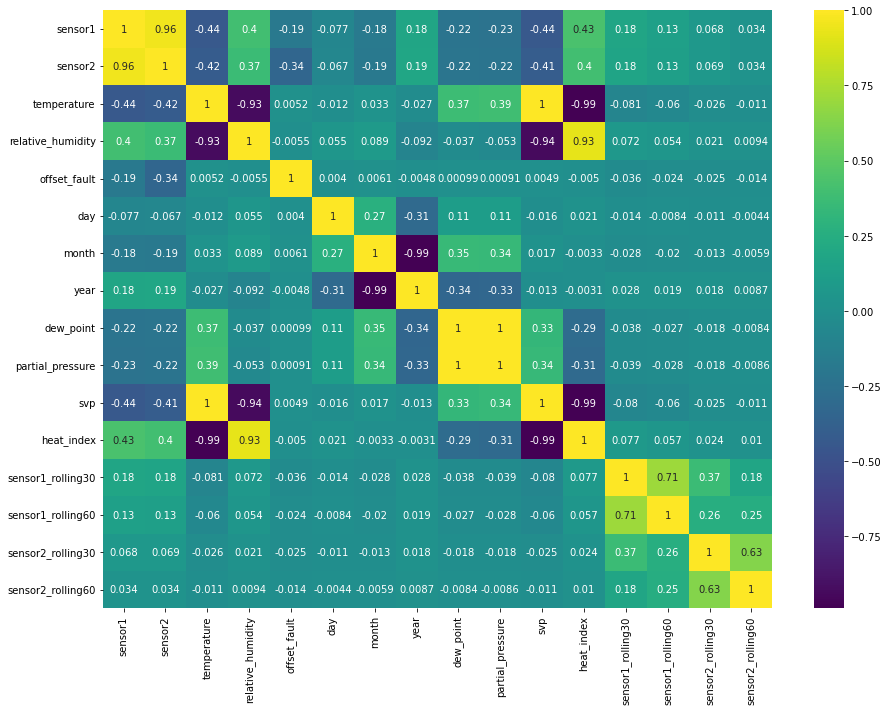

In [140]:
plt.figure(figsize=(15,11))
sns.heatmap(data_.corr(),annot=True,cmap="viridis")

<AxesSubplot:>

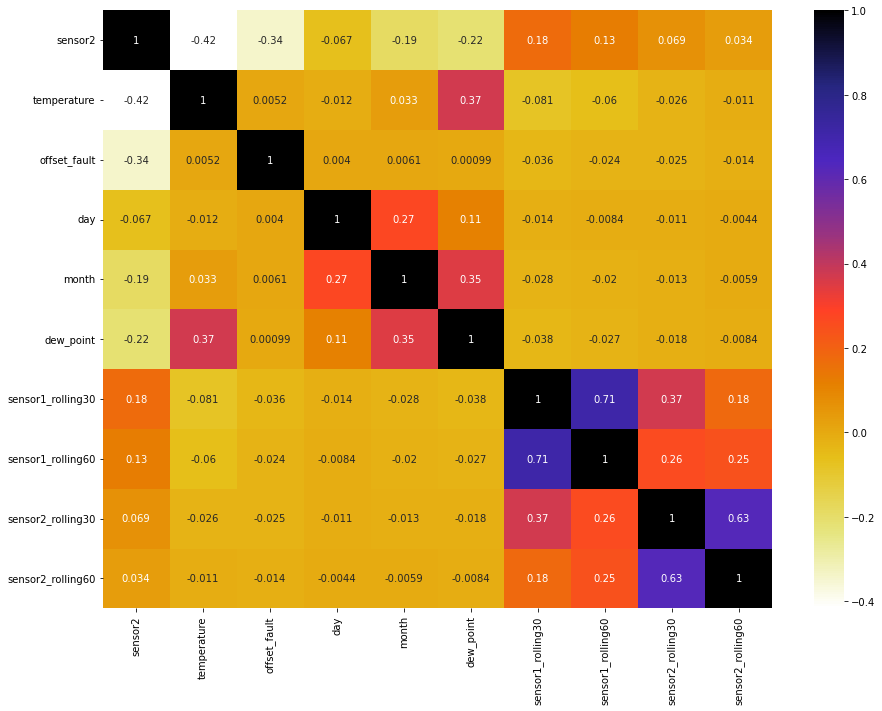

In [19]:
#Lets drop some features based on correlation
plt.figure(figsize=(15,11))
sns.heatmap(data_.drop(columns=['heat_index','year','relative_humidity','sensor1','svp','partial_pressure']).corr(),annot=True,cmap=plt.cm.CMRmap_r)

Heat map after correlated features have been dropped, we will save this data seperately and compare results with all features

In [20]:
data_corr = data_.drop(columns=['heat_index','year','relative_humidity','sensor1','svp','partial_pressure'])

In [ ]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif

var= VarianceThreshold()
mutual_info = mutual_info_classif()

I will hold on on univariate feature selection and wrapper methods for now, cause i don't want to overfit the data as these selection processes all use the fit method

In [27]:
data = data_.to_csv("data_featureEngineering.csv")
data_corr = data_corr.to_csv("data_lessFeaturesEngineering.csv")

AttributeError: 'NoneType' object has no attribute 'to_csv'